# MALIS 19.3 WPM_T9.2
## Datenanalyse der offenen Daten der Seattle Public Library (Checkouts)
Mit fünf verschiedenen Fragen werden die Checkout-Daten analysiert und die Lösungen implementiert. Hierfür werden die Checkout-Daten der Public Library des Jahres 2019 importiert. Die Datenmenge wird auf 10.000 Zeilen begrenzt.

### Erster Schritt: Packages importieren
Vor dem Download der Checkout-Daten werden zwei hilfeiche Packages importiert: urllib.request und pandas.

In [1]:
import urllib.request
import pandas as pd

### Zweiter Schritt: Checkout-Daten downloaden

In [8]:
url = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2019&$limit=10000"
spl_file = "checkouts.csv"

In [9]:
# Überprüfen
spl_file

'checkouts.csv'

In [5]:
# Überprüfen
url

'https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2019&$limit=10000'

In [10]:
urllib.request.urlretrieve(url, spl_file)

('checkouts.csv', <http.client.HTTPMessage at 0x7f5269342650>)

In [12]:
checkouts = pd.read_csv(spl_file)

In [13]:
checkouts

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
0,Digital,OverDrive,AUDIOBOOK,2019,12,2,The Teenage Brain (Enchanced): A Neuroscientis...,Frances E. Jensen,"Nonfiction, Psychology",HarperCollins Publishers Inc.,2015
1,Physical,Horizon,BOOK,2019,12,3,Richard Scarry's Smokey the fireman.,"Scarry, Richard","Fire fighters Juvenile fiction, Animals Juveni...","Random House,",2015.
2,Physical,Horizon,BOOK,2019,12,1,Vernon Subutex : roman. Tome 1 / Virginie Desp...,"Despentes, Virginie, 1969-","Music stores France Paris Fiction, Businessmen...",Grasset : Les Éditions Graset & Fasquelle : Li...,janvier 2018.
3,Physical,Horizon,BOOK,2019,12,1,The lost Gospel of Mary : the Mother of Jesus ...,NaN,Mary Blessed Virgin Saint,"Paraclete Press,",[2007]
4,Digital,OverDrive,EBOOK,2019,12,2,"Be Mine Forever: Bennetts Series, Book 3",Kennedy Ryan,"Fiction, Literature, Romance","Hachette Digital, Inc.",2015
...,...,...,...,...,...,...,...,...,...,...,...
9995,Physical,Horizon,BOOK,2019,12,1,Artemisia Gentileschi : the image of the femal...,"Garrard, Mary D.",Gentileschi Artemisia 1593 1652 or 1653 Critic...,"Princeton University Press,",[1989]
9996,Digital,OverDrive,EBOOK,2019,12,1,"Birth of an Empire: Genghis Series, Book 1",Conn Iggulden,"Fiction, Historical Fiction","Random House, Inc.",2010
9997,Digital,OverDrive,EBOOK,2019,12,1,"An Affair Without End: Willowmere Series, Book 3",Candace Camp,"Fiction, Historical Fiction, Romance","Simon & Schuster, Inc.",2014
9998,Physical,Horizon,BOOK,2019,12,1,The vine basket / Josanne La Valley.,"La Valley, Josanne","Basket making Juvenile fiction, Fathers and da...","Clarion Books, Houghton Mifflin Harcourt,",[2013]


In [16]:
# 1. Überraschung: ich hatte die Ausleihdaten aller 12 Monate erwartet!
# Grund: liegt es eventuell an der Begrenzung der Zeilen auf 10.000?
# Ich kann meine fünf Fragen aber auch gut für die Ausleihdaten von Dezember 2019 stellen.

### 1. Frage: Welches Medium wurde im Dezember 2019 am häufigsten ausgeliehen?

In [19]:
# Zur besseren Übersicht die Namen der Spalten auflisten:
checkouts.columns

Index(['usageclass', 'checkouttype', 'materialtype', 'checkoutyear',
       'checkoutmonth', 'checkouts', 'title', 'creator', 'subjects',
       'publisher', 'publicationyear'],
      dtype='object')

In [31]:
# Erst einmal: Wie lautet die Zahl der höchsten Ausleihe?
checkouts.checkouts.max()

560

In [41]:
# 560 Ausleihen - davon kann die "kleine" Stadtbücherei Münster nur träumen!!
# Wie hoch war die geringste Ausleihe?
checkouts.checkouts.min()

1

In [42]:
# Und die durchschnittliche Ausleihe:
checkouts.checkouts.mean()

3.652

In [55]:
# Zurück zur eigentlichen Frage: Welches Medium hatte 560 Ausleihen? Gesucht wird die Zeile:
checkmax = checkouts.checkouts.max()

In [56]:
checkmax

560

In [58]:
# Anzeigen der Zeile und somit des Mediums mit der höchsten Anzahl an Ausleihen
checkouts[checkouts.checkouts >= checkmax]

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
7134,Physical,Horizon,BOOK,2019,12,560,The testaments / Margaret Atwood.,"Atwood, Margaret, 1939-","Surrogate mothers Fiction, Man woman relations...","Nan A. Talese/Doubleday,",2019


In [59]:
# Antwort der 1. Frage: Das analoge Buch "The testaments" von Margaret Atwood wurde am häufigsten ausgeliehen.

### 2. Frage:

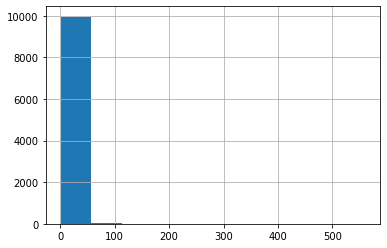

In [54]:
checkouts["checkouts"].hist()

### spätere Frage: Wie viele Ausleihen hatte die Public Library im Dezember 2019?

### spätere Frage: In ÖBs spielt die Aktualität der Medien eine große Rolle: Welche und wie viele der im Dezember 2019 ausgeliehenen Medien wurden auch im selben Jahr publiziert?

In [27]:
checkouts["publicationyear"] = 2019
# Hat nicht funktioniert, weil diese Spalte keine Nummern, sondern Text enthält!!
# s. https://dev.socrata.com/foundry/data.seattle.gov/tmmm-ytt6